# Análise de Componentes Principais em Python
A Análise de Componentes Principais é um método para reduzir a dimensionalidade de conjuntos de dados, aumentando a interpretabilidade, mas ao mesmo tempo minimizando a perda de informações. Ele faz isso criando novas variáveis não correlacionadas que maximizam sucessivamente a variância.

Este tutorial fornece um exemplo passo a passo de como executar a Análise de Componente Principal em Python.

### Passo 1: Carregar as bibliotecas necessárias

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Passo 2: Carregar/criar base de dados

Como exemplo, utilizaremos uma matriz simples, conforme abaixo:

$X = \begin{pmatrix} 5 & 1 \\ 2 & 5 \\ 3 & 2 \\ 6 & 6 \\ 4 & 1 \\ 4 & 3 \end{pmatrix}
y = \begin{pmatrix} 0 \\ 1 \\ 0 \\ 1 \\ 1 \\ 1 \end{pmatrix}$
 
A matriz  $X$  representa as características (features), enquanto  $y$  representa a classe (target).

In [57]:
# Criação das matrizes
df = pd.DataFrame({
    'var1':[5,2,3,6,4,4],
    'var2':[1,5,2,6,1,3],
    'target': [1,1,0,1,0,1]})

X = df[['var1','var2']] # Seleciona o conjunto das Features
y = df['target'] # Seleciona o target
df # Imprime a base

,var1,var2,target
0,5,1,1
1,2,5,1
2,3,2,0
3,6,6,1
4,4,1,0
5,4,3,1


### Passo 3: Calcular a média de cada coluna da matriz das características (features)

Para o calcular a média da coluna $i$ utilizaremos a equação abaixo:

$$\frac{∑_{j}X_{ji}}{n}$$
        
com  $n$  sendo o número de linhas da matriz  $X$

In [58]:
# Calcular a média de cada coluna da matriz das características (features)
mean_vec = np.mean(X, axis=0)
print(mean_vec)

var1    4.0
var2    3.0
dtype: float64


### Passo 4: Determinar a matriz de covariância
- Nesta etapa utilizaremos uma matriz auxiliar ($M$).
- Para determinar a matriz $M$ subtraia a média da coluna $i$ da coluna respectiva de $X$. 

In [59]:
# subtraindo a média da respectiva coluna de X
M = X - mean_vec

Em seguida calcula-se a matriz de covariância de X, que é dada por:

$$C=\frac{1}{n−1}M^T M$$
 
onde  $n$  é o número de linhas de  $X$

In [60]:
# Calculando matriz de covariância
C = M.T.dot(M) / (X.shape[0]-1)
C # Print C

,var1,var2
var1,2.0,0.2
var2,0.2,4.4


### Passo 5: Determinar auto-valores e auto-vetores da matriz de covariância C. 

Os auto-valores  $λ$  de $C$ são raizes de
$$p_C(x)=det(C−xI)$$
 
onde $I$ é a matriz identidade.

Cada auto-valor  $λ$  tem auto-vetores associados. Apesar de auto-vetores nunca serem nulos, se incluírmos o vetor nulo no conjunto dos auto-vetores associados e chamarmos esse novo conjunto de  $Vλ$, temos que  $Vλ$  é o conjunto solução do seguinte sistema:

$$(C−λI)X=0$$

In [61]:
# Determinando auto-valores e auto-vetores
autovalores, autovetores = np.linalg.eig(C)

# Imprimindo auto-valores de C
print("Auto-valores:")
print(autovalores)
print()

# Imprimindo autovetores
print("Auto-vetores:")
print(autovetores)

Auto-valores:
[1.98344749 4.41655251]

Auto-vetores:
[[-0.99659268 -0.08248053]
 [ 0.08248053 -0.99659268]]


In [62]:
# Ordenando em ordem descrecente
pares_de_autos = [
    (
        np.abs(autovalores[i]),
        autovetores[:,i]
    ) for i in range(len(autovalores))
]
pares_de_autos.sort()
pares_de_autos.reverse()

### Passo 6: Calcular o quanto cada componente (auto-vetores) estão representando a variabilidade dos dados 
Para isso usaremos duas medidas.

- A variância explicada de cada auto-valor  $λ$  é dada por:
$$\frac{λ}{∑_{j}λ_{j}}$$
 
- A variância explicada acumulada de cada auto-valor  $λi$  é dada por:
$$\frac{∑_{j≤i}λ_{j}}{∑_{j}λ_{j}}$$

In [63]:
# Calculando a variância explicada e a variância explicada cumulativa
total = sum(autovalores)
var_exp = [
    (i / total)*100 for i in sorted(
        autovalores, reverse=True
    )
]
cum_var_exp = np.cumsum(var_exp)

### Passo 7: Visuzalização sumarizada das transformações

In [64]:
# Visualizando as informações
x = [
    'PC %s' %i for i in range(
        1,len(autovalores)+1
    )
]
df_temp = pd.DataFrame(
    {'auto-valores': autovalores,
     'cum_var_exp':cum_var_exp,
     'var_exp':var_exp,
     'Componente':x}
)
print(df_temp)
print()
print("Auto-vetores")
for autovetor in [p[1] for p in pares_de_autos]:
    print(autovetor)
print()

   auto-valores  cum_var_exp    var_exp Componente
0      1.983447    69.008633  69.008633       PC 1
1      4.416553   100.000000  30.991367       PC 2

Auto-vetores
[-0.08248053 -0.99659268]
[-0.99659268  0.08248053]



### Passo 8: Visuzalização gráfica
Considerando os dados originais como pares ordenados em  $R^2$ , pois  $X$  possui apenas duas colunas, ao mudar da base canônica para a base composta pelos auto-vetores encontrados, teremos uma nova representação do conjunto  $X$

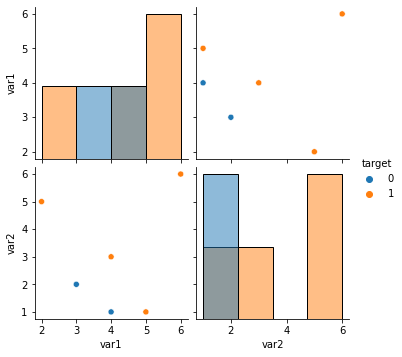

In [65]:
# visualizando graficamente os dados originais
sns.pairplot(
    df,
    vars = ['var1','var2'],
    hue='target',
    diag_kind="hist"
)
plt.show()

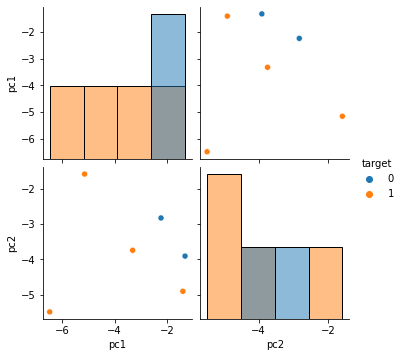

In [66]:
# visualizando graficamente os dados através da mudança de base
# considerando base de auto-vetores
n_componentes = 2 # projetamos nas 2 (duas) primeiras componentes
autovetores = [p[1] for p in pares_de_autos]
A = autovetores[0:n_componentes] 
X = np.dot(X,np.array(A).T)
new_df = pd.DataFrame(X,columns=['pc1','pc2'])
new_df['target'] = df['target']
sns.pairplot(
    new_df, vars = ['pc1','pc2'], hue='target', diag_kind="hist"
)
plt.show()

# PCA com a biblioteca Scikit-learn
Agora iremos fazer a mesma coisa, mas utilizaremos a biblioteca Scikit-learn para comparar os resultados

### Passo 1: Carregar as bibliotecas necessárias

In [69]:
# biblioteca
from sklearn.decomposition import PCA

### Passo 2: Carregar/criar base de dados

In [74]:
# Criação das matrizes
df = pd.DataFrame({
    'var1':[5,2,3,6,4,4],
    'var2':[1,5,2,6,1,3],
    'target': [1,1,0,1,0,1]})

X = df[['var1','var2']] # Seleciona o conjunto das Features
y = df['target'] # Seleciona o target
df # Imprime a base

,var1,var2,target
0,5,1,1
1,2,5,1
2,3,2,0
3,6,6,1
4,4,1,0
5,4,3,1


### Passo 3: Obtém PCA com a função da biblioteca Scikit-learn

In [75]:
# pca
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

### Comparação dos resultados

In [76]:
print("Auto-valores:")
print(pca.explained_variance_)
print()

print("Auto-vetores:")
print(pca.components_)
print()

print("Variância explicada:")
print(pca.explained_variance_ratio_)
print()

Auto-valores:
[4.41655251 1.98344749]

Auto-vetores:
[[ 0.08248053  0.99659268]
 [-0.99659268  0.08248053]]

Variância explicada:
[0.69008633 0.30991367]



### Nota: 
Observe que, como a escolha dos auto-vetores não é única, o algoritmo implementado na biblioteca Scikit-learn escolheu auto-vetores diferentes dos nossos. Mas, isso não é problema, pois só houve inversão de sinal. Logo, quando fizermos a visualização gráfica da mudança de coordenada, haverá uma inversão da figura. Vejamos

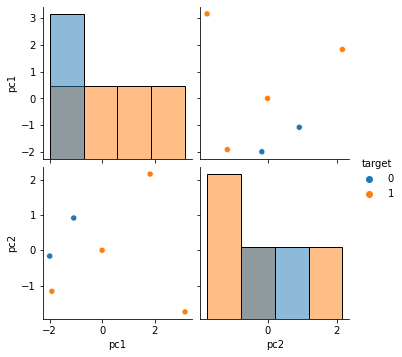

In [77]:
# Tranformando X
X = pca.transform(X)

# Visualizando
new_df = pd.DataFrame(X, columns=['pc1','pc2'])
new_df['target'] = df['target']
sns.pairplot(
    new_df, vars = ['pc1','pc2'], hue='target', diag_kind="hist")
plt.show()

## Agora vamos testar a PCA em uma base de dados grande

Neste exemplo utilizaremos a $PCA$ para reduzir a dimensionalidade do conjunto de dados $Iris$ de 4 para 2 features.

In [78]:
from sklearn import datasets # importar datasets para utilzizar os exemplos

# Seleciona a base de dados Iris
iris = datasets.load_iris()
#convert dataset to pandas DataFrame
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                 columns = iris['feature_names'] + ['target'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

X = df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
y = df['target']

### Nota: 
Faremos novamente passo a passo. O código é análogo ao código usado no exemplo anterior.

In [79]:
mean_vec = np.mean(X, axis=0)
M = X - mean_vec
C = M.T.dot(M) / (X.shape[0]-1)
autovalores, autovetores = np.linalg.eig(C)
pares_de_autos = [
    (
        np.abs(autovalores[i]),
        autovetores[:,i]
    ) for i in range(len(autovalores))
]
pares_de_autos.sort()
pares_de_autos.reverse()
total = sum(autovalores)
var_exp = [
    (i / total)*100 for i in sorted(autovalores, reverse=True)
]
cum_var_exp = np.cumsum(var_exp)

In [80]:
x = ['PC %s' %i for i in range(1,len(autovalores)+1)]
df_temp = pd.DataFrame(
    {'auto-valores': autovalores,
     'cum_var_exp':cum_var_exp,
     'var_exp':var_exp,
     'Componente':x}
)
print(df_temp)
print()
print("Auto-vetores")
for autovetor in [p[1] for p in pares_de_autos]:
    print(autovetor)
print()

   auto-valores  cum_var_exp    var_exp Componente
0      4.228242    92.461872  92.461872       PC 1
1      0.242671    97.768521   5.306648       PC 2
2      0.078210    99.478782   1.710261       PC 3
3      0.023835   100.000000   0.521218       PC 4

Auto-vetores
[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
[-0.65658877 -0.73016143  0.17337266  0.07548102]
[-0.58202985  0.59791083  0.07623608  0.54583143]
[ 0.31548719 -0.3197231  -0.47983899  0.75365743]



### Nota: 
Com duas componentes temos uma variância explicada cumulativa de 97%. Utilizaremos então, vamos usar apenas duas componentes

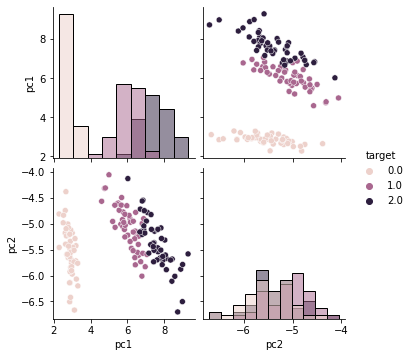

In [81]:
n_componentes = 2 # projetamos nas 2 (duas) primeiras componentes
autovetores = [p[1] for p in pares_de_autos]
A = autovetores[0:n_componentes] 
X = np.dot(X,np.array(A).T)
new_df = pd.DataFrame(X, columns=['pc1','pc2'])
new_df['target'] = df['target']
sns.pairplot(
    new_df, vars = ['pc1','pc2'],
    hue='target', diag_kind="hist")
plt.show()

# PCA no conjunto de dados Iris com biblioteca
Novamente, carregamos o conjunto de dados.

In [82]:
from sklearn import datasets

# Seleciona a base de dados Iris
iris = datasets.load_iris()
#convert dataset to pandas DataFrame
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                 columns = iris['feature_names'] + ['target'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

X = df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
y = df['target']

### Nota:
Repetimos o processo, mas desta vez, utilizando o PCA da biblioteca Scikit-learn

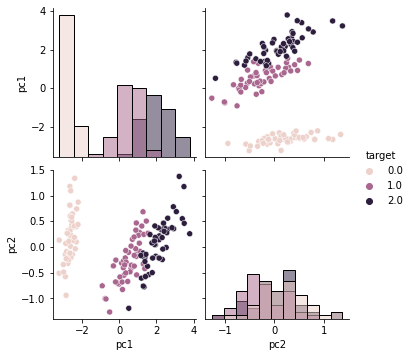

In [83]:
pca = PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)
new_df = pd.DataFrame(X, columns=['pc1','pc2'])
new_df['target'] = df['target']
sns.pairplot(
    new_df, vars = ['pc1','pc2'],
    hue='target', diag_kind="hist")
plt.show()

# Agora utilizaremos a PCA para reduzir a dimensão de imagens

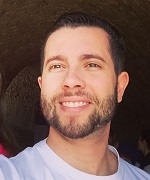

### Passo 1: Carregar as bibliotecas necessárias

In [84]:
from skimage import color
from skimage import io

### Passo 2: Carrega uma imagem de teste

In [85]:
# Carregando a imagem e visualizando dimensões
img = io.imread('eu.jpg')
X = color.rgb2gray(img)

#plt.imshow(image, cmap='gray')
X.shape

(600, 500)

### Passo 3: Obtém PCA com a função da biblioteca Scikit-learn 
- Observe que a matriz tem 600 linhas e 500 colunas. 
- Neste exemplo iremos solicitar que a PCA garanta 99% de variância explicada cumulativa

In [86]:
# aplicando PCA
pca = PCA(0.99) # variância explicada de 0.99
lower_dimension_data = pca.fit_transform(X)
lower_dimension_data.shape

(600, 47)

### Nota: 
O número 0.99 passado como parâmetro para o métodos PCA diz que queremos um número de componentes que nos garanta 99% de variância explicada cumulativa. Observe que para isso, utilizou-se 47 componentes. Isso é uma redução imensa, uma vez que a original possuia 500 colunas. Queremos ver, caso necessário recuperar a imagem, como essas imagens ficam com a dimensão reduzida. Para isso serão necessários duas funções auxiliares.

In [88]:
def pca_with_var_exp(X, var_exp=0.99):
    pca = PCA(var_exp) # variância explicada de 0.99
    lower_dimension_data = pca.fit_transform(X)
    print(lower_dimension_data.shape)
    approximation = pca.inverse_transform(lower_dimension_data)
    return approximation

def plot_subplot(X, i):
    plt.subplot(3,2,i)
    plt.imshow(X, cmap="gray")
    plt.xticks([])
    plt.yticks([])

### Nota:
A primeira função reduz a imagem X mantendo var_exp de variância explicada cumulativa. Compararemos 3 valores: 0.99, 0.95 e 0.90.

In [89]:
# calculando algumas aproximações
img_1 = pca_with_var_exp(X, var_exp=0.99)
img_2 = pca_with_var_exp(X, var_exp=0.95)
img_3 = pca_with_var_exp(X, var_exp=0.90)

(600, 47)
(600, 11)
(600, 6)


### Nota: 
A segunda função mostra o gráfico. Utilizaremos ela para comparar as imagens obtidas com a original.

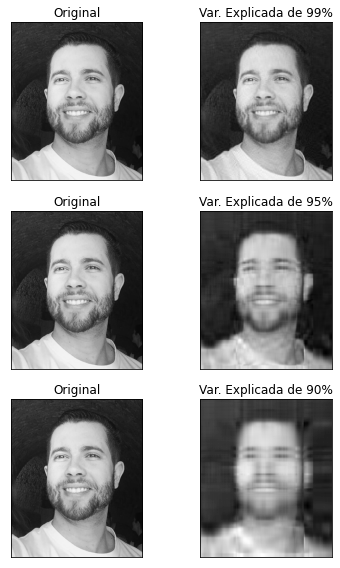

In [90]:
# Visualizando aproximações
plt.figure(figsize=(6,8))

plot_subplot(X, 1)
plt.title("Original")
plot_subplot(img_1, 2)
plt.title("Var. Explicada de 99%")
plot_subplot(X, 3)
plt.title("Original")
plot_subplot(img_2, 4)
plt.title("Var. Explicada de 95%")
plot_subplot(X, 5)
plt.title("Original")
plot_subplot(img_3, 6)
plt.title("Var. Explicada de 90%")

plt.tight_layout()
plt.show()